# 7. Activation Functions

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 7.1 Draw Activation Functions

In [3]:
x = torch.linspace(-5, 5, 500)

y_sigmoid = torch.sigmoid(x).data.numpy()
y_relu = F.relu(x).data.numpy()
y_leaky_relu = F.leaky_relu(x, negative_slope=0.1).data.numpy()
y_softplus = F.softplus(x).data.numpy()

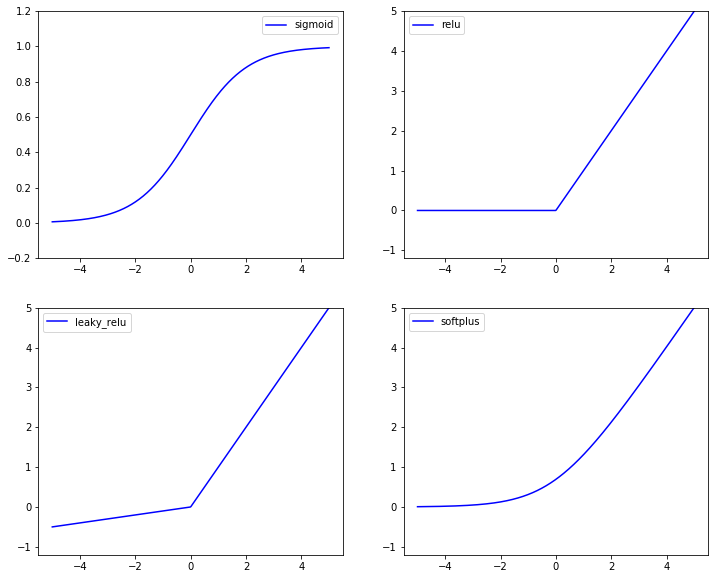

In [4]:
plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.plot(x.data.numpy(), y_sigmoid, c='blue', label='sigmoid')
plt.ylim((-0.2,1.2))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x.data.numpy(), y_relu, c='blue', label='relu')
plt.ylim((-1.2, 5))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x.data.numpy(), y_leaky_relu, c='blue', label='leaky_relu')
plt.ylim((-1.2, 5))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x.data.numpy(), y_softplus, c='blue', label='softplus')
plt.ylim((-1.2, 5))
plt.legend(loc='best')
plt.show()

## 7.2 Generate Data

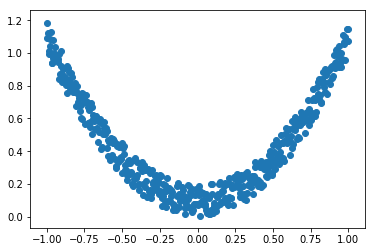

In [5]:
x = torch.linspace(-1, 1, 500)
y = x.pow(2) + 0.2*torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [6]:
x.shape, y.shape

(torch.Size([500]), torch.Size([500]))

In [7]:
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)

In [8]:
x.shape, y.shape

(torch.Size([500, 1]), torch.Size([500, 1]))

## 7.3 Define & Train Linear Model

In [9]:
hidden = nn.Linear(1, 20, bias=True)
output = nn.Linear(20, 1, bias=True)

In [10]:
model = nn.Sequential(hidden, output)

In [11]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

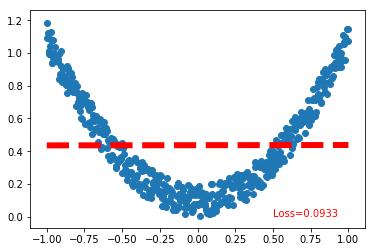

In [12]:
for step in range(500):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw=6)
plt.text(0.5, 0, 'Loss=%.4f' % cost.item(), fontdict={'size':10, 'color':'red'})
plt.show()

## 7.4 Define & Train NonLinear Model

In [13]:
hidden = nn.Linear(1, 20, bias=True)
activation = nn.ReLU()
output = nn.Linear(20, 1, bias=True)

In [14]:
model = nn.Sequential(hidden, activation, output)

In [15]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

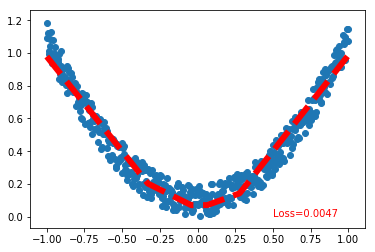

In [16]:
for step in range(500):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw=6)
plt.text(0.5, 0, 'Loss=%.4f' % cost.item(), fontdict={'size':10, 'color':'red'})
plt.show()